# Imports

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import gridspec as gridspec
import seaborn as sns 

import ast

## Funções Auxiliares

In [2]:
def barplot(title:str, 
            group:str, 
            agg:str, 
            agg_name:str, 
            data:pd.DataFrame, 
            agg_func:str, 
            figure= plt.figure, 
            title_font_size:int =10, 
            figsize=(10,5),
            subplot:plt.subplot = None, 
            grid:list = None, 
            label=True,
            rotation_label:int = 45,
            position_label:str = 'center',
            color_label:str = 'white',
            size_label:str = 'small',
            sort: bool = True, 
            hue:str = None,
            stacked:bool = False,
            orient:str = 'h'):
    
    group_list = [group]
    if hue:
        group_list.append(hue)

    # group data
    aux = data[group_list + [agg]].groupby(group_list).agg(agg_func).reset_index().rename(columns={agg:agg_name})

    if sort:
        aux = aux.sort_values(agg_name, ascending=False)
        
    # plot
    if subplot:
        subplot(grid)
    else:
        figure(figsize=figsize)

    # plot configs
    plt.title(title, fontsize=title_font_size)
    plt.xticks(rotation = rotation_label)

    # figure
    if orient == 'h':
        g = sns.barplot(x = group, y = agg_name, hue = hue, dodge = not stacked, data = aux)
    elif orient == 'v':
        g = sns.barplot(y = group, x = agg_name, hue = hue, dodge = not stacked, data = aux)
    else:
        raise('Valor de oriente inválido')

    if label:
        for i in g.containers:
            g.bar_label(i, color = color_label, label_type=position_label, fontsize = size_label)
    else:
        pass

def unstacked_plot(
            title:str, 
            group:str, 
            hue:str,
            agg_name:str, 
            data:pd.DataFrame, 
            subplot:plt.subplot = None, 
            grid:list = None, 
            title_font_size:int =10, 
            figsize=(10,5),
            column_order:list = [],
            label=True, 
            rotation_label:int = 45,
            position_label:str = 'center',
            color_label:str = 'white',
            size_label:str = 'small',
            sort: bool = True, 
            normalize:bool=True,
            fmt:str = '%.2f'
            ):
        

    df_grouped = data[[group, hue]].groupby(group).value_counts(normalize=normalize).unstack(hue)

    if column_order != []:
        df_grouped = df_grouped.loc[column_order]

    # figure
    g = df_grouped.plot.bar(stacked=True,figsize=figsize);

    # plot configs
    plt.title(title, fontsize=title_font_size)
    plt.xticks(rotation = rotation_label)

    if label:
        for i in g.containers:
            g.bar_label(i, color = color_label ,label_type=position_label, fontsize = size_label, fmt=fmt)
    else:
        pass

    return None

def histplot(title:str, col:str, data:pd.DataFrame, figsize=(10,5), label=True):

    plt.figure(figsize=figsize)
    plt.title(title)
    g = sns.histplot(x = col,  data = data)
    plt.xticks(rotation = 45)
    if label:
        for i in g.containers:
            g.bar_label(i, color = 'white',label_type='center')
    else:
        pass


# Carregando Dados

In [3]:
df_gupy = pd.read_excel('../data/data_clean/vagas_gupy_clean.xlsx')
df_vagas = pd.read_excel('../data/data_clean/vagas_vagas_clean.xlsx')
df_glassdoor = pd.read_excel('../data/data_clean/vagas_glassdoor_clean_reduzido.xlsx')

df_full = pd.concat([df_gupy, df_vagas, df_glassdoor], axis=0, ignore_index=True)

del df_gupy, df_vagas, df_glassdoor

df_full.shape

(1793, 24)

# Análise Descritiva dos Dados

In [4]:
df1 = df_full.copy()

In [5]:
# df1 = df1.loc[df1['site_da_vaga'] != 'Glassdoor']

## Dimensão dos Dados

In [6]:
print(f'Total de Linhas {df1.shape[0]}')
print(f'Total de Colunas {df1.shape[1]}')

Total de Linhas 1793
Total de Colunas 24


## Tratando NAs

In [7]:
df1.isna().sum()

site_da_vaga            0
link_site               0
link_origem            27
data_publicacao         0
data_expiracao       1357
data_coleta             0
posicao                 0
senioridade             0
titulo_vaga          1349
nome_empresa            0
cidade                 23
estado                 14
modalidade              0
contrato             1349
regime                417
pcd                  1349
beneficios            271
habilidades_macro     166
habilidades_micro     152
competencias          567
codigo_vaga             0
descricao              28
titulo_da_vaga        444
skills                453
dtype: int64

### Removendo NAs

In [8]:
#df1 = df1.dropna(subset=['cidade'])
df1 = df1.dropna(subset=['estado'])

### Preenchendo NAs

In [9]:
df1.loc[df1['senioridade'].isna(), 'senioridade'] = 'Não informado'
df1.loc[df1['contrato'].isna(), 'contrato'] = 'Efetivo'

In [10]:
df1.isna().sum()

site_da_vaga            0
link_site               0
link_origem            25
data_publicacao         0
data_expiracao       1345
data_coleta             0
posicao                 0
senioridade             0
titulo_vaga          1337
nome_empresa            0
cidade                  9
estado                  0
modalidade              0
contrato                0
regime                417
pcd                  1337
beneficios            268
habilidades_macro     163
habilidades_micro     149
competencias          563
codigo_vaga             0
descricao              28
titulo_da_vaga        442
skills                451
dtype: int64

## Tipo das Variáveis

In [11]:
df1.dtypes

site_da_vaga         object
link_site            object
link_origem          object
data_publicacao      object
data_expiracao       object
data_coleta          object
posicao              object
senioridade          object
titulo_vaga          object
nome_empresa         object
cidade               object
estado               object
modalidade           object
contrato             object
regime               object
pcd                  object
beneficios           object
habilidades_macro    object
habilidades_micro    object
competencias         object
codigo_vaga          object
descricao            object
titulo_da_vaga       object
skills               object
dtype: object

In [12]:
# df1['data_publicacao'] = pd.to_datetime(df1['data_publicacao'])
# df1['data_expiracao'] = pd.to_datetime(df1['data_expiracao'])
# df1['data_coleta'] = pd.to_datetime(df1['data_coleta'])

In [13]:
df1['habilidades_macro'] = df1['habilidades_macro'].apply(lambda x: x if pd.isnull(x) else ast.literal_eval(x))
df1['habilidades_micro'] = df1['habilidades_micro'].apply(lambda x: x if pd.isnull(x) else ast.literal_eval(x))
df1['competencias'] = df1['competencias'].apply(lambda x: x if pd.isnull(x) else ast.literal_eval(x))
df1['beneficios'] = df1['beneficios'].apply(lambda x: x if pd.isnull(x) else ast.literal_eval(x))

In [14]:
df1.dtypes

site_da_vaga         object
link_site            object
link_origem          object
data_publicacao      object
data_expiracao       object
data_coleta          object
posicao              object
senioridade          object
titulo_vaga          object
nome_empresa         object
cidade               object
estado               object
modalidade           object
contrato             object
regime               object
pcd                  object
beneficios           object
habilidades_macro    object
habilidades_micro    object
competencias         object
codigo_vaga          object
descricao            object
titulo_da_vaga       object
skills               object
dtype: object

## Estatística Descritiva

In [15]:
df1.columns

Index(['site_da_vaga', 'link_site', 'link_origem', 'data_publicacao',
       'data_expiracao', 'data_coleta', 'posicao', 'senioridade',
       'titulo_vaga', 'nome_empresa', 'cidade', 'estado', 'modalidade',
       'contrato', 'regime', 'pcd', 'beneficios', 'habilidades_macro',
       'habilidades_micro', 'competencias', 'codigo_vaga', 'descricao',
       'titulo_da_vaga', 'skills'],
      dtype='object')

In [16]:
df1['posicao'] = df1['posicao'].replace(
    {'Analista':'Analista de Dados',
     'Cientista':'Cientista de Dados',
     'Engenharia de Dados':'Engenheiro de Dados',
     'Não identificado':'Engenheiro de Dados',
     '"Analista de Dados"': 'Analista de Dados',
     '"Cientista de Dados"': 'Cientista de Dados',
     '"Engenharia de Dados"': 'Engenheiro de Dados'
     })

In [17]:
columns = ['site_da_vaga', 'posicao', 'senioridade', 'estado', 'modalidade', 'contrato', 'pcd']
cat_atributes = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

for col in columns:
    print(f'{col}: {cat_atributes[col].unique().tolist()}\n')

site_da_vaga: ['Gupy', 'Vagas.com', 'Glassdoor']

posicao: ['Cientista de Dados', 'Analista de Dados', 'Engenheiro de Dados']

senioridade: ['Pleno', 'Não informado', 'Sênior', 'Júnior', 'Pleno/Sênior', 'Júnior/Pleno', 'Júnior/Trainee', 'Gerência', 'Estágio', 'Não Informado']

estado: ['Não informado', 'São Paulo', 'Minas Gerais', 'Goiás', 'Rio de Janeiro', 'Ceará', 'Bahia', 'Paraná', 'Mato Grosso do Sul', 'Espírito Santo', 'Santa Catarina', 'Distrito Federal', 'RJ', 'Rio Grande do Sul', 'Paraíba', 'SP', 'Mato Grosso', 'SC', 'PR', 'Todo o Brasil', 'MG', 'MS', 'DF', 'BA', 'RS', 'GO', 'CE', 'AM', 'MT', 'ES', 'PE', 'PA', 'MA', 'AL', 'SE', 'RN', 'PB']

modalidade: ['Remoto', 'Híbrido', 'Presencial', 'Efetivo']

contrato: ['Efetivo', 'Associado', 'Pessoa Jurídica', 'Banco de Talentos', 'Estágio', 'Temporário', 'Não informado', 'Autônomo']

pcd: ['Também p/ PcD', 'Não informado', 'Sim', nan]



In [18]:
df1['posicao'].unique()

array(['Cientista de Dados', 'Analista de Dados', 'Engenheiro de Dados'],
      dtype=object)

# Feature Engineering

In [61]:
senioridade_dict = {
    'Júnior/Pleno':'Pleno',
    'Pleno/Sênior':'Sênior',
    'Júnior/Trainee':'Júnior',
    'Auxiliar/Operacional':'Auxiliar',
    'Supervisão/Coordenação': 'Coordenação'
}

df1['senioridade'] = df1['senioridade'].replace(senioridade_dict)

In [62]:
dict_estados = {
'São Paulo': 'SP',
'Minas Gerais':'MG',
'Goiás': 'GO',
'Rio de Janeiro': 'RJ',
'Ceará': 'CE',
'Bahia': 'BA',
'Paraná': 'PR',
'Mato Grosso do Sul': 'MS',
'Espírito Santo': 'ES',
'Santa Catarina':'SC',
'Distrito Federal': 'DF',
'Rio Grande do Sul': 'RS',
'Paraíba': 'PB',
'Mato Grosso':'MT'
}

df1['estado'] = df1['estado'].replace(dict_estados)

In [93]:
df1 = df1.loc[df1['modalidade'] != 'Efetivo']

# Análise Exploratória de Dados

Entendendo a distribuição e a relação entre as variáveis

In [94]:
df2 = df1.copy()

## Análise Univariada

### Variáveis Númericas

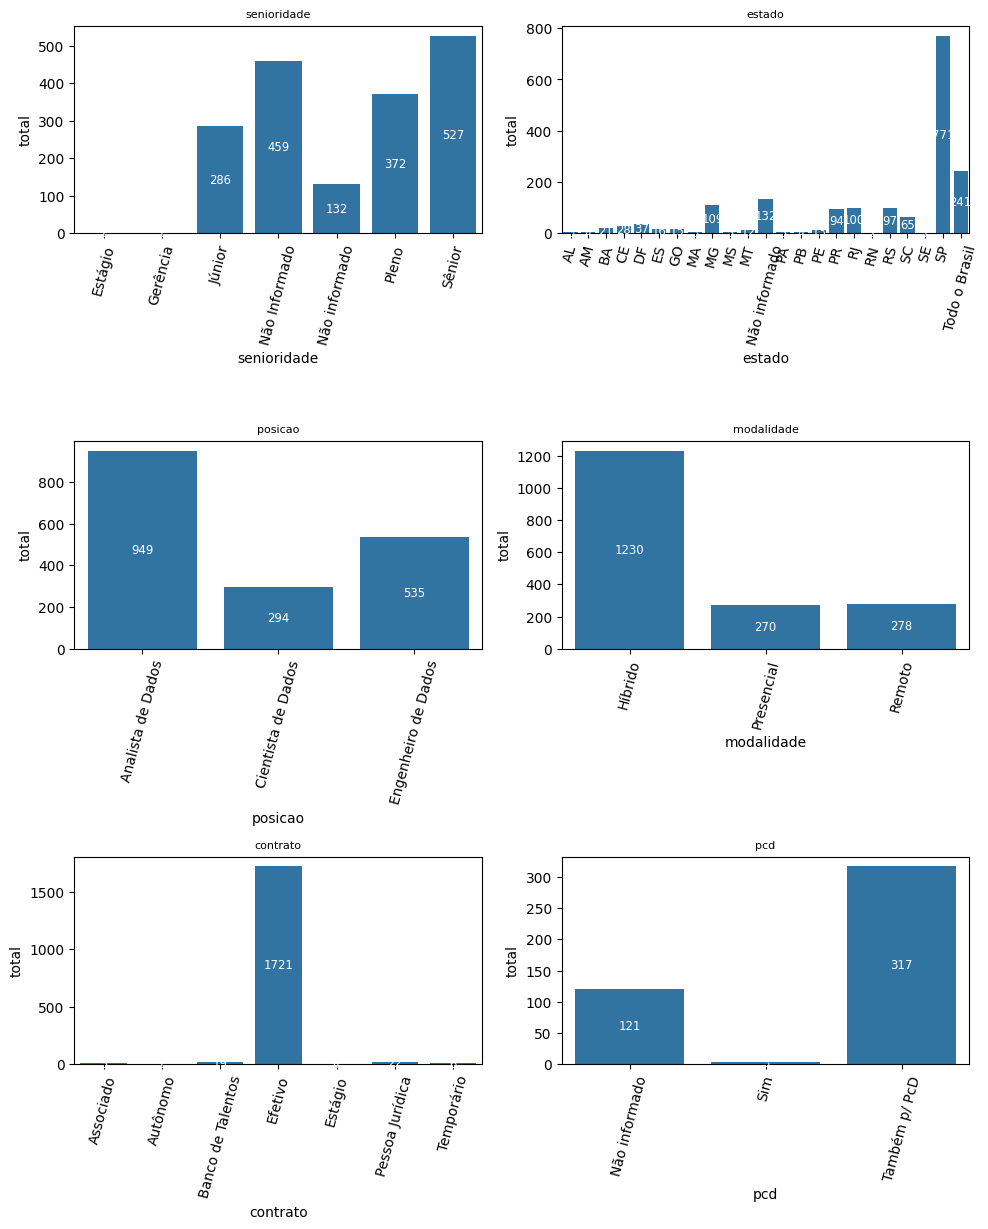

In [95]:
grid = gridspec.GridSpec(4,2)
plt.figure(figsize=(10,15))

cols = ['senioridade', 'estado', 'posicao','modalidade', 'contrato', 'pcd']

for i in range(len(cols)):
    
    q, mod = divmod(i,2)

    f1 = plt.subplot
    col = cols[i]
    barplot(title=f'{col}',
            title_font_size=8,
            group=col,
            agg='link_site', 
            agg_name = 'total',
            agg_func = 'count',
            data = df2,
            subplot = f1,
            grid = grid[q,mod],
            sort=False,
            rotation_label = 75)

plt.tight_layout()

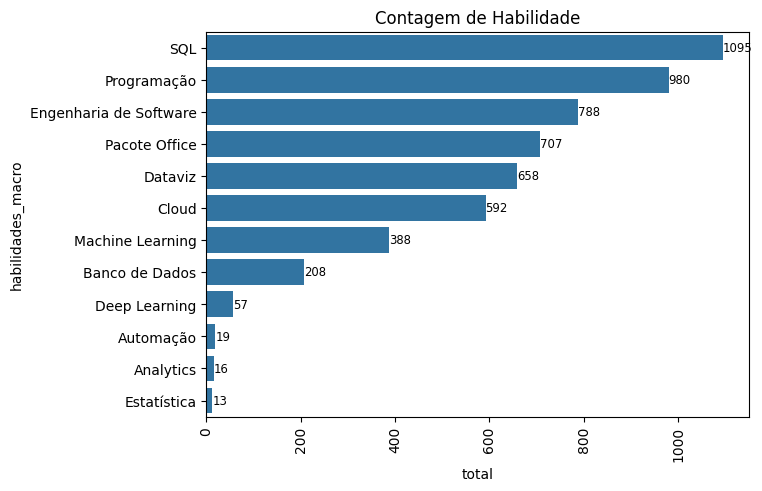

In [96]:
df2_skills = df2.explode('habilidades_macro')

barplot(title='Contagem de Habilidade',
        title_font_size=12,
        group='habilidades_macro',
        agg='link_site', 
        agg_name = 'total',
        agg_func = 'count',
        data = df2_skills,
        figsize=(7,5),
        sort=True,
        label=True,
        rotation_label = 90,
        color_label = 'black',
        position_label='edge',
        size_label='small',
        orient = 'v')

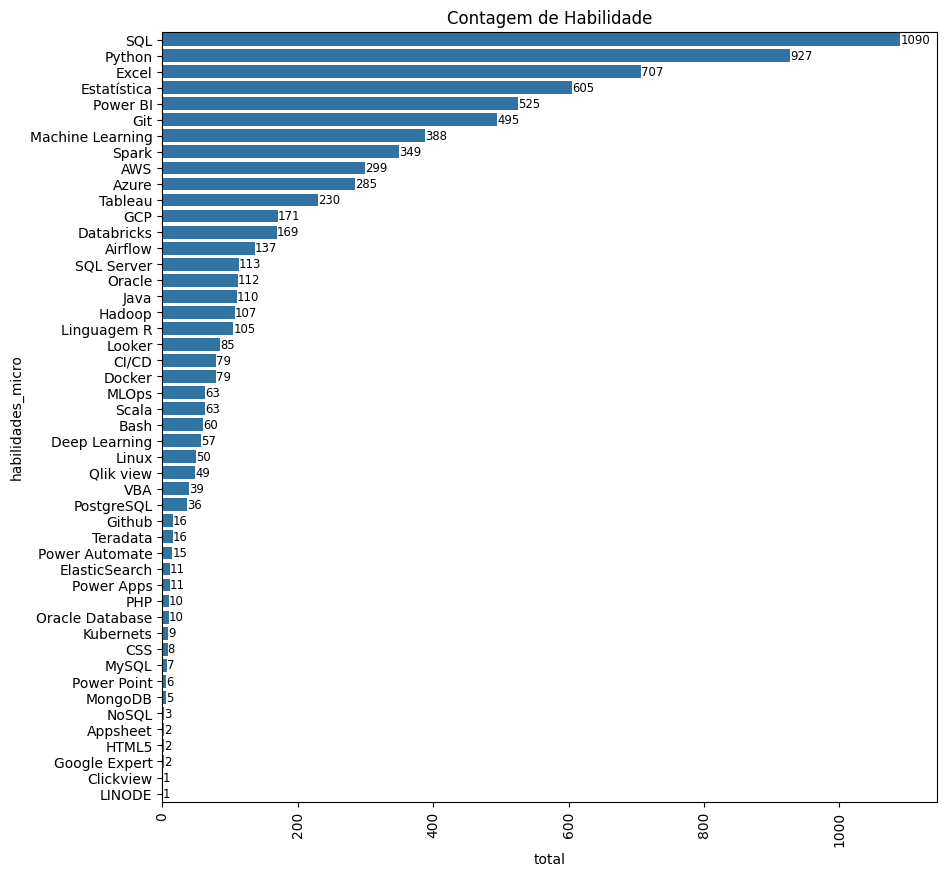

In [97]:
df2_skills = df2.explode('habilidades_micro')

barplot(title='Contagem de Habilidade',
        title_font_size=12,
        group='habilidades_micro',
        agg='link_site', 
        agg_name = 'total',
        agg_func = 'count',
        data = df2_skills,
        figsize=(10,10),
        sort=True,
        label=True,
        rotation_label = 90,
        color_label = 'black',
        position_label='edge',
        size_label='small',
        orient = 'v')

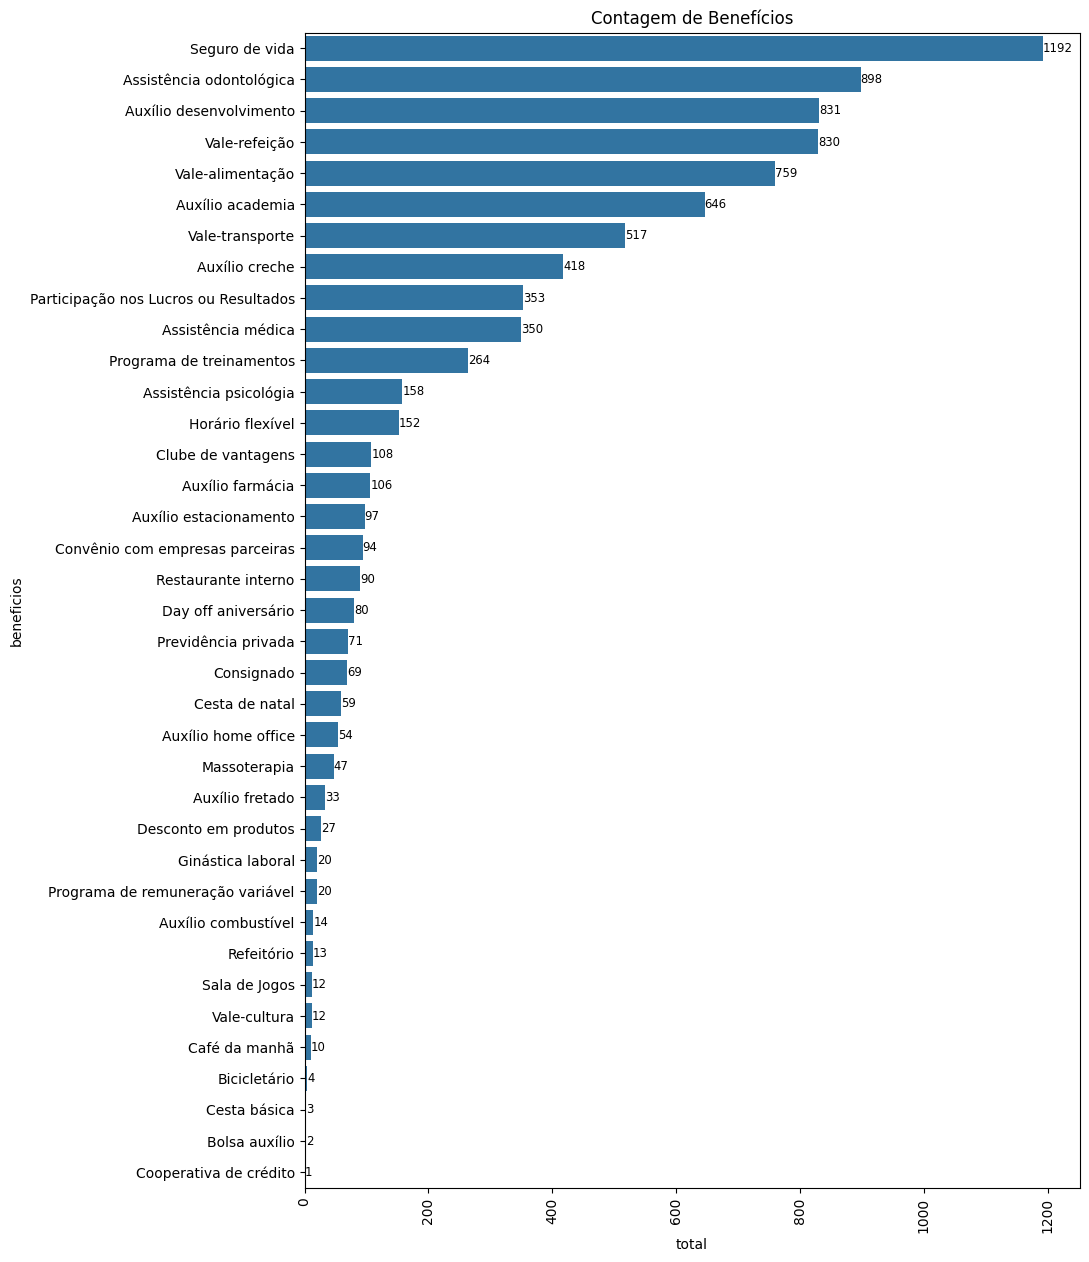

In [98]:
df2_benefits = df2.explode('beneficios')

barplot(title='Contagem de Benefícios',
        title_font_size=12,
        group='beneficios',
        agg='link_site', 
        agg_name = 'total',
        agg_func = 'count',
        data = df2_benefits,
        figsize=(10,15),
        sort=True,
        label=True,
        rotation_label = 90,
        color_label='black',
        position_label='edge',
        size_label='small',
        orient = 'v')

## Análise Bivariada

### Sites

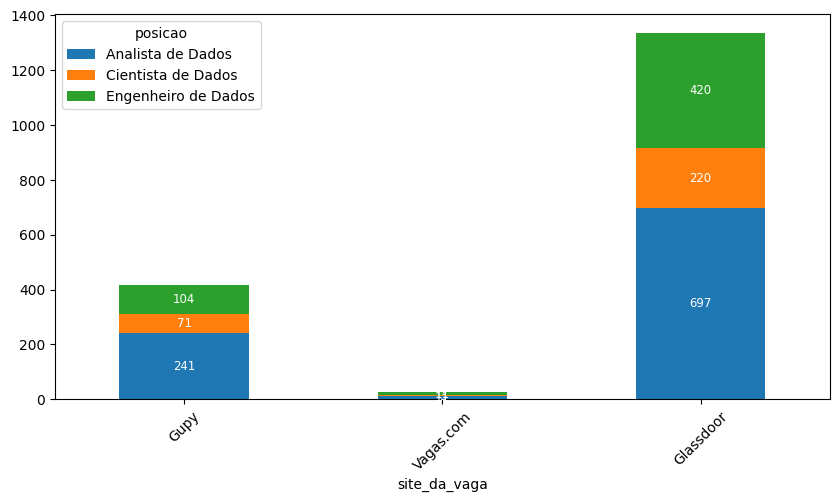

In [99]:
unstacked_plot(
    title = '',
    group='site_da_vaga',
    hue='posicao',
    agg_name='total',
    figsize=(10,5),
    data=df2,
    column_order=df2['site_da_vaga'].unique().tolist(),
    normalize=False,
    fmt = '%.0f'
)

### Senioridade

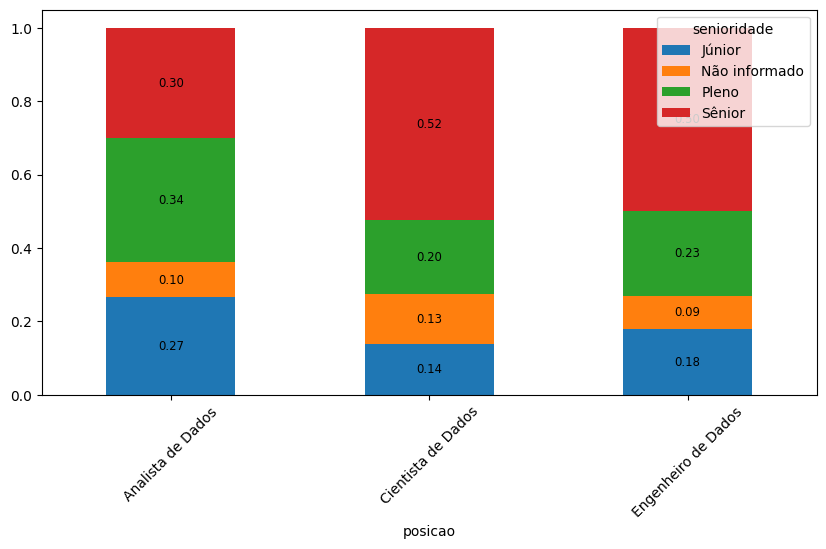

In [100]:
df_aux = df2.loc[df2['senioridade'].isin(['Não informado','Júnior','Pleno','Sênior'])]

unstacked_plot(
    title = '',
    group='posicao',
    hue='senioridade',
    agg_name='total',
    # figsize=(10,5),
    data=df_aux,
    normalize=True,
    color_label='black',
    fmt = '%.2f'
)

### Modalidade

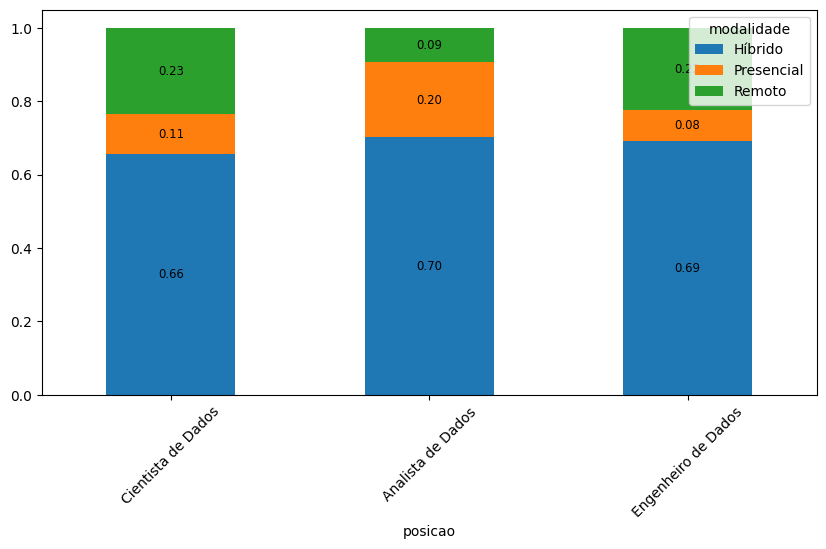

In [101]:
unstacked_plot(
    title = '',
    group='posicao',
    hue='modalidade',
    agg_name='total',
    # figsize=(10,5),
    data=df2,
    column_order=df2['posicao'].unique().tolist(),
    normalize=True,
    color_label='black',
    fmt = '%.2f'
);

### Tipo de Contrato

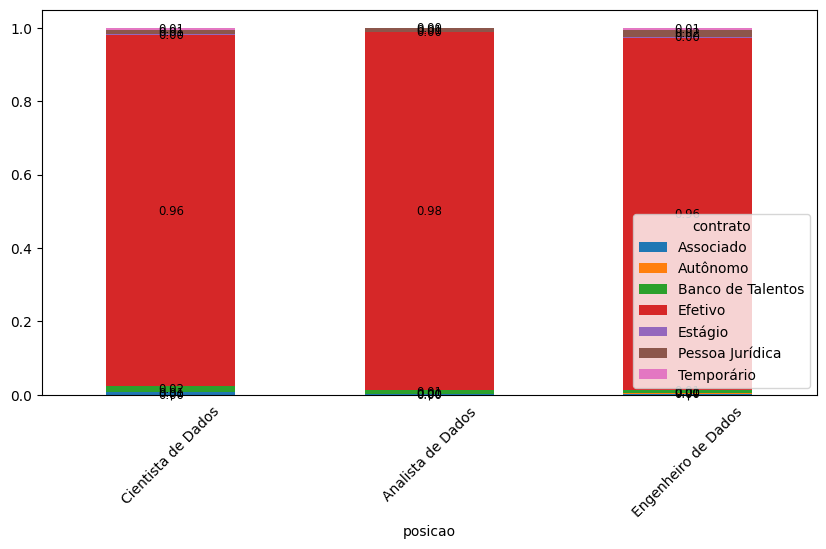

In [102]:
unstacked_plot(
    title = '',
    group='posicao',
    hue='contrato',
    agg_name='total',
    figsize=(10,5),
    data=df2,
    column_order=df2['posicao'].unique().tolist(),
    normalize=True,
    color_label='black',
    fmt = '%.2f'
);

### Remige (CLT, PJ..)

In [103]:
# unstacked_plot(
#     title = '',
#     group='regime',
#     hue='posicao',
#     agg_name='total',
#     figsize=(10,5),
#     data=df2,
#     column_order=df2['regime'].unique().tolist(),
#     normalize=False,
#     color_label='black',
#     fmt = '%.0f'
# );

### Estado

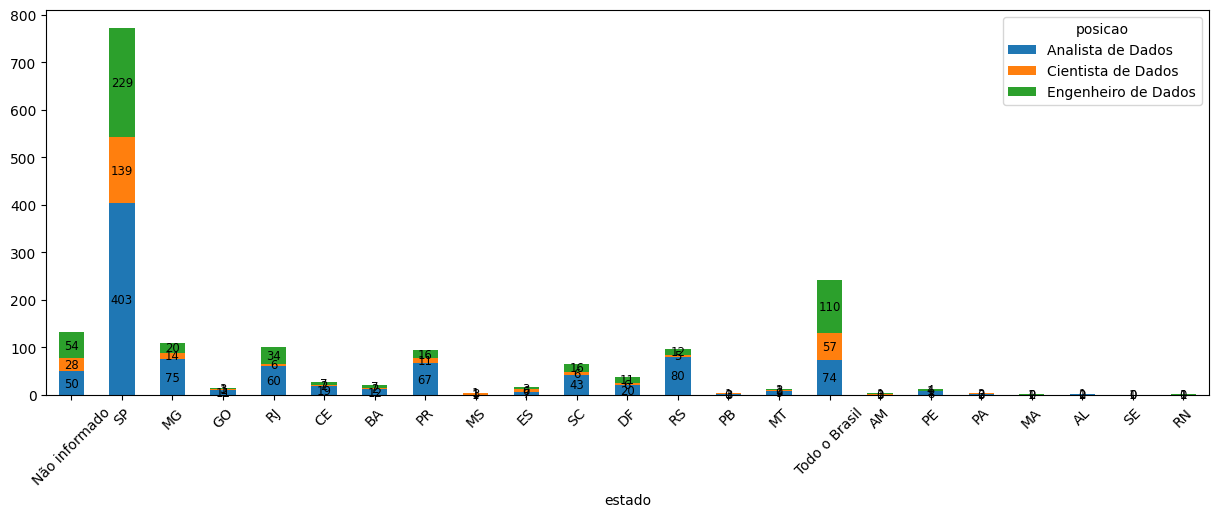

In [104]:
unstacked_plot(
    title = '',
    group='estado',
    hue='posicao',
    agg_name='total',
    figsize=(15,5),
    data=df2,
    column_order=df2['estado'].unique().tolist(),
    normalize=False,
    color_label='black',
    fmt = '%.0f'
);

### Habilidades

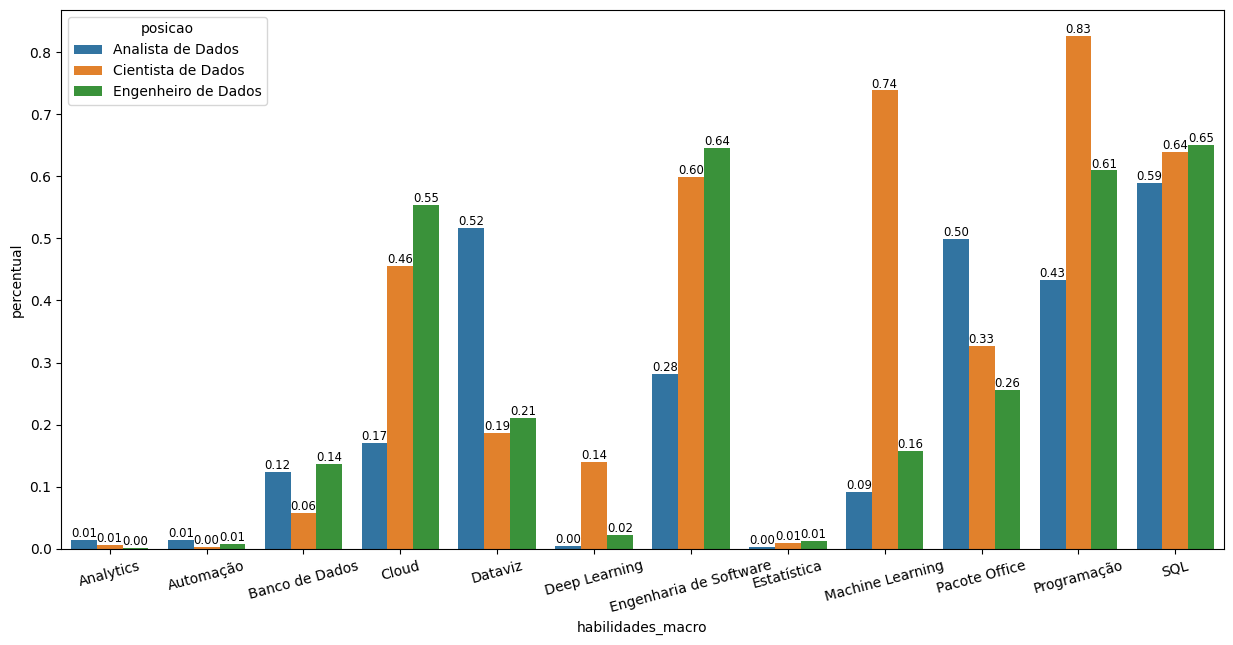

In [105]:
df2_skills = df2.explode('habilidades_macro')
df_aux = pd.crosstab(df2_skills['habilidades_macro'], df2_skills['posicao']).reset_index()
df_aux['Analista de Dados'] = df_aux['Analista de Dados'] / df2.loc[df2['posicao'] == 'Analista de Dados'].shape[0]
df_aux['Cientista de Dados'] = df_aux['Cientista de Dados'] / df2.loc[df2['posicao'] == 'Cientista de Dados'].shape[0]
df_aux['Engenheiro de Dados'] = df_aux['Engenheiro de Dados'] / df2.loc[df2['posicao'] == 'Engenheiro de Dados'].shape[0]

df_aux = df_aux.melt(id_vars=['habilidades_macro'], value_vars=['Analista de Dados','Cientista de Dados','Engenheiro de Dados'], value_name='percentual')

plt.figure(figsize=(15,7))
g = sns.barplot(x = 'habilidades_macro', y ='percentual', hue='posicao', data = df_aux)
plt.xticks(rotation = 15)
for i in g.containers:
    g.bar_label(i, label_type='edge', color = 'black', fmt='%.2f', fontsize='small')

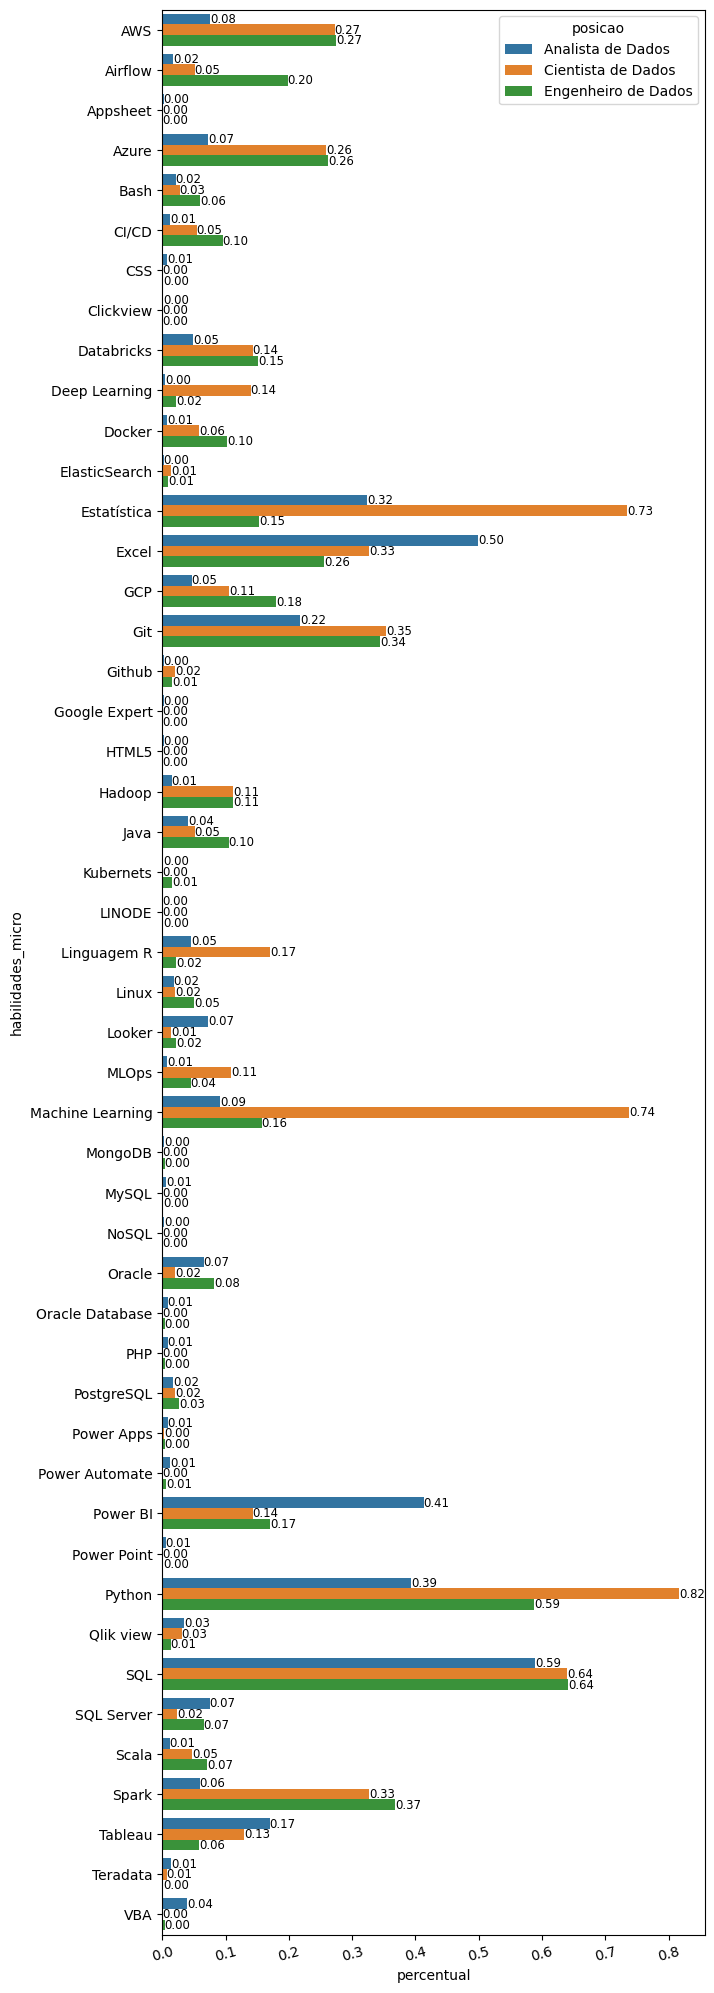

In [106]:
df2_skills = df2.explode('habilidades_micro')

df_aux = pd.crosstab(df2_skills['habilidades_micro'], df2_skills['posicao']).reset_index()
df_aux['Analista de Dados'] = df_aux['Analista de Dados'] / df2.loc[df2['posicao'] == 'Analista de Dados'].shape[0]
df_aux['Cientista de Dados'] = df_aux['Cientista de Dados'] / df2.loc[df2['posicao'] == 'Cientista de Dados'].shape[0]
df_aux['Engenheiro de Dados'] = df_aux['Engenheiro de Dados'] / df2.loc[df2['posicao'] == 'Engenheiro de Dados'].shape[0]

df_aux = df_aux.melt(id_vars=['habilidades_micro'], value_vars=['Analista de Dados','Cientista de Dados','Engenheiro de Dados'], value_name='percentual')

plt.figure(figsize=(7,25))
g = sns.barplot(x = 'percentual', y ='habilidades_micro', hue='posicao', data = df_aux)
plt.xticks(rotation = 15)
for i in g.containers:
    g.bar_label(i, label_type='edge', color = 'black', fmt='%.2f', fontsize='small')

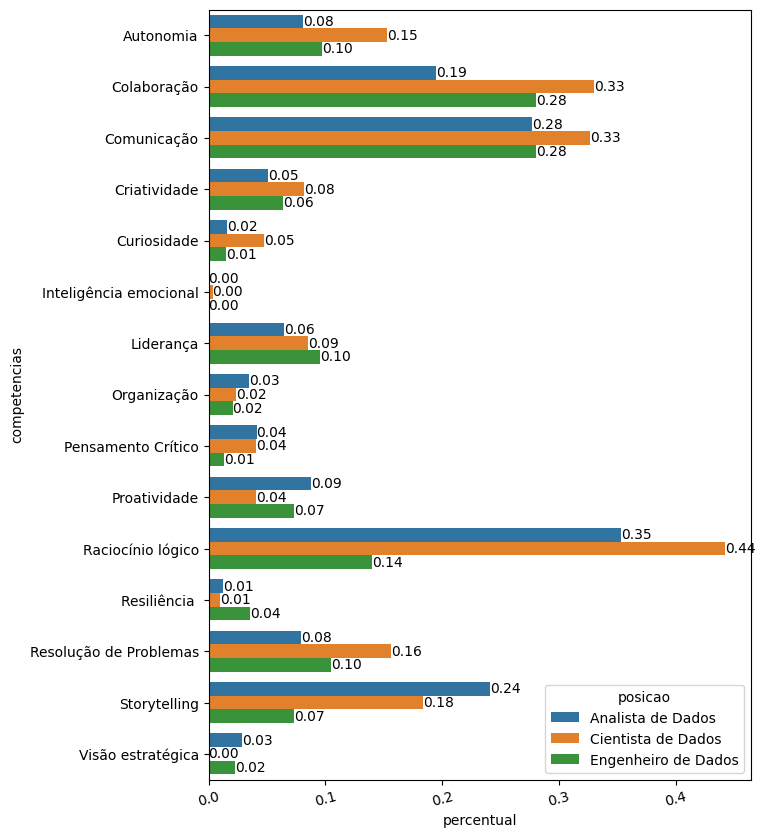

In [107]:
df2_skills = df2.explode('competencias')

df_aux = pd.crosstab(df2_skills['competencias'], df2_skills['posicao']).reset_index()
df_aux['Analista de Dados'] = df_aux['Analista de Dados'] / df2.loc[df2['posicao'] == 'Analista de Dados'].shape[0]
df_aux['Cientista de Dados'] = df_aux['Cientista de Dados'] / df2.loc[df2['posicao'] == 'Cientista de Dados'].shape[0]
df_aux['Engenheiro de Dados'] = df_aux['Engenheiro de Dados'] / df2.loc[df2['posicao'] == 'Engenheiro de Dados'].shape[0]

df_aux = df_aux.melt(id_vars=['competencias'], value_vars=['Analista de Dados','Cientista de Dados','Engenheiro de Dados'], value_name='percentual')

plt.figure(figsize=(7,10))
g = sns.barplot(x = 'percentual', y ='competencias', hue='posicao', data = df_aux)
plt.xticks(rotation = 15)
for i in g.containers:
    g.bar_label(i, label_type='edge', color = 'black', fmt='%.2f')

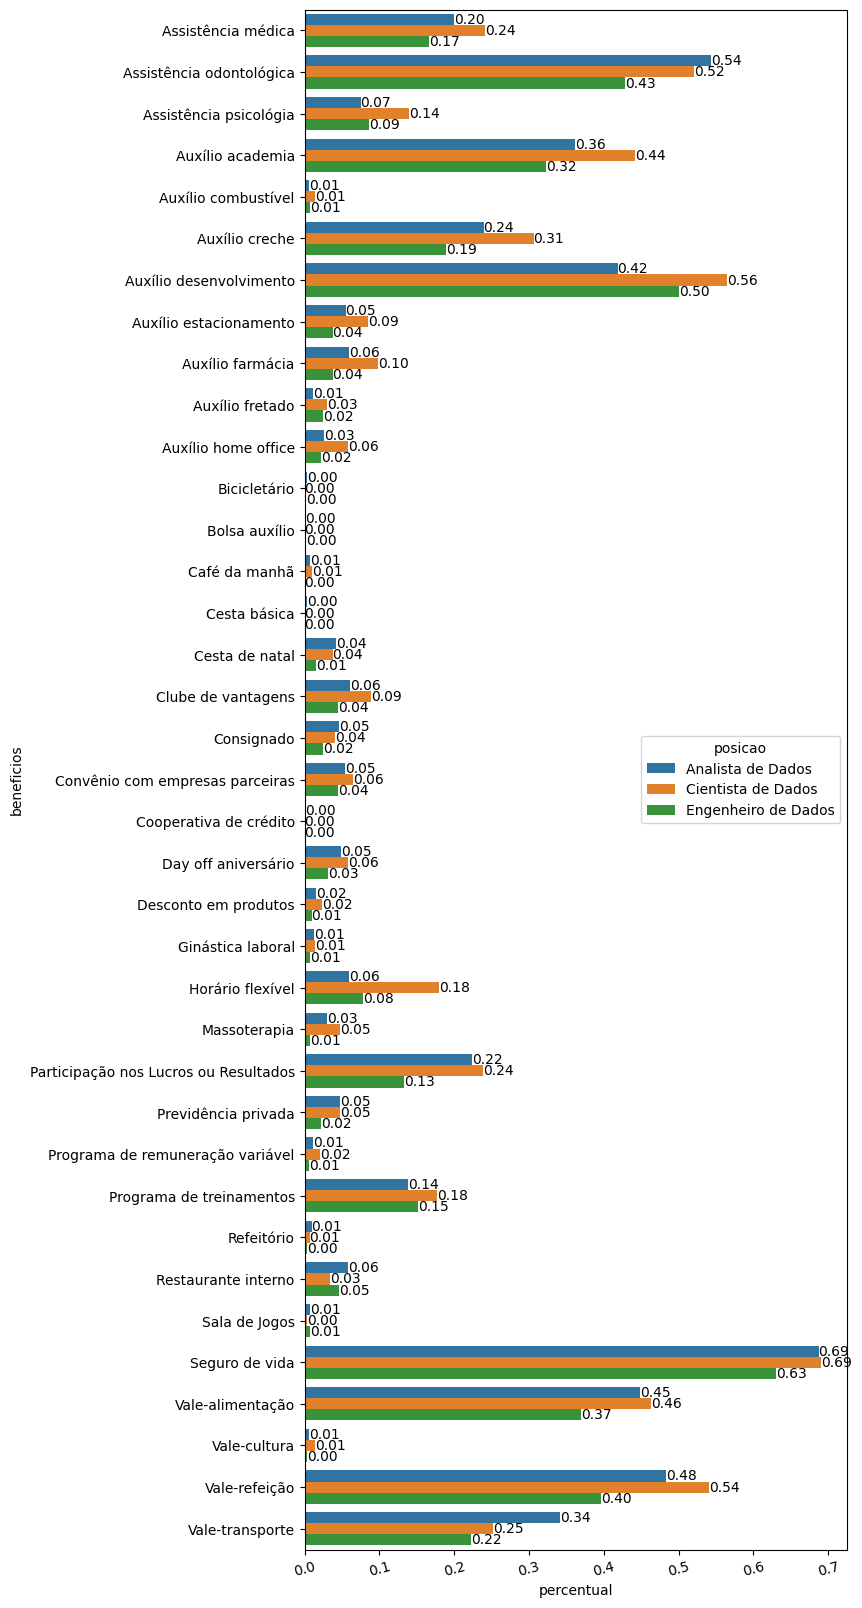

In [108]:
df2_benefits = df2.explode('beneficios')

df_aux = pd.crosstab(df2_benefits['beneficios'], df2_benefits['posicao']).reset_index()
df_aux['Analista de Dados'] = df_aux['Analista de Dados'] / df2.loc[df2['posicao'] == 'Analista de Dados'].shape[0]
df_aux['Cientista de Dados'] = df_aux['Cientista de Dados'] / df2.loc[df2['posicao'] == 'Cientista de Dados'].shape[0]
df_aux['Engenheiro de Dados'] = df_aux['Engenheiro de Dados'] / df2.loc[df2['posicao'] == 'Engenheiro de Dados'].shape[0]

df_aux = df_aux.melt(id_vars=['beneficios'], value_vars=['Analista de Dados','Cientista de Dados','Engenheiro de Dados'], value_name='percentual')

plt.figure(figsize=(7,20))
g = sns.barplot(x = 'percentual', y ='beneficios', hue='posicao', data = df_aux)
plt.xticks(rotation = 15)
for i in g.containers:
    g.bar_label(i, label_type='edge', color = 'black', fmt='%.2f')

## Hipóteses de Negócio

In [109]:
df_analista = df1.loc[df1['posicao'] == 'Analista de Dados']
df_cientista = df1.loc[df1['posicao'] == 'Cientista de Dados']
df_engenheiro = df1.loc[df1['posicao'] == 'Engenheiro de Dados']

### Analista de Dados

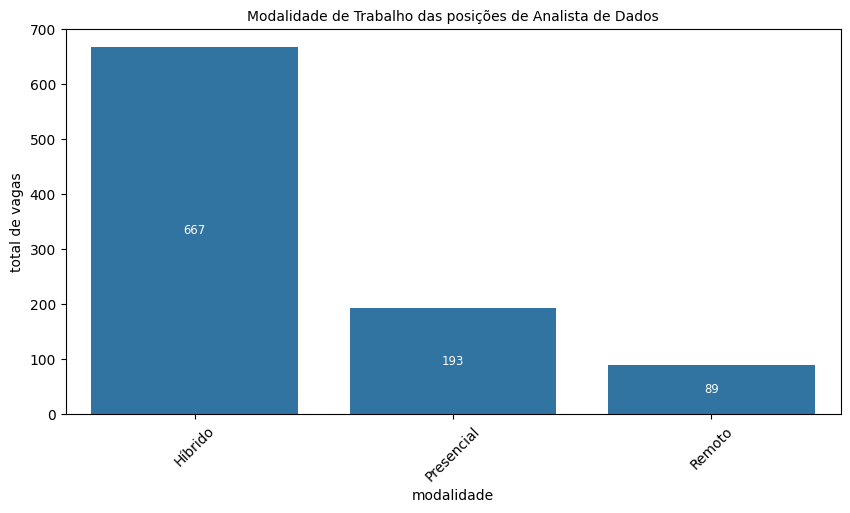

In [110]:
barplot(
    title = 'Modalidade de Trabalho das posições de Analista de Dados',
    group = 'modalidade',
    agg='link_site',
    agg_name='total de vagas',
    agg_func = 'count',
    data = df_analista
)

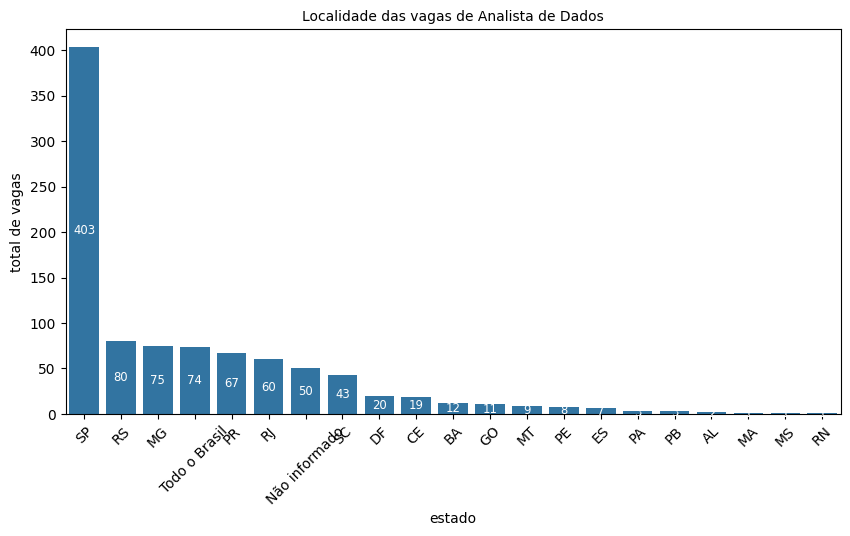

In [111]:
barplot(
    title = 'Localidade das vagas de Analista de Dados',
    group = 'estado',
    agg='link_site',
    agg_name='total de vagas',
    agg_func = 'count',
    data = df_analista
)

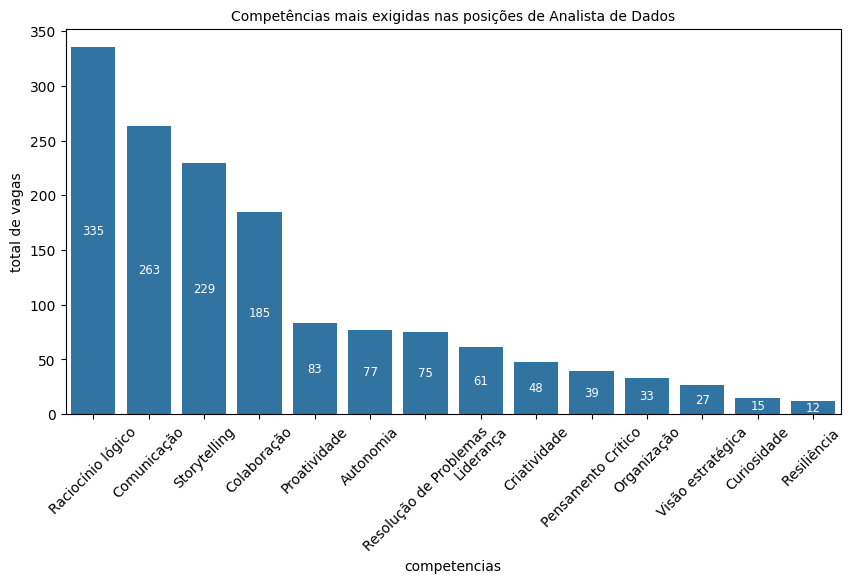

In [112]:
df_analista_aux = df_analista.explode('competencias')

barplot(
    title = 'Competências mais exigidas nas posições de Analista de Dados',
    group = 'competencias',
    agg='link_site',
    agg_name='total de vagas',
    agg_func = 'count',
    data = df_analista_aux
)

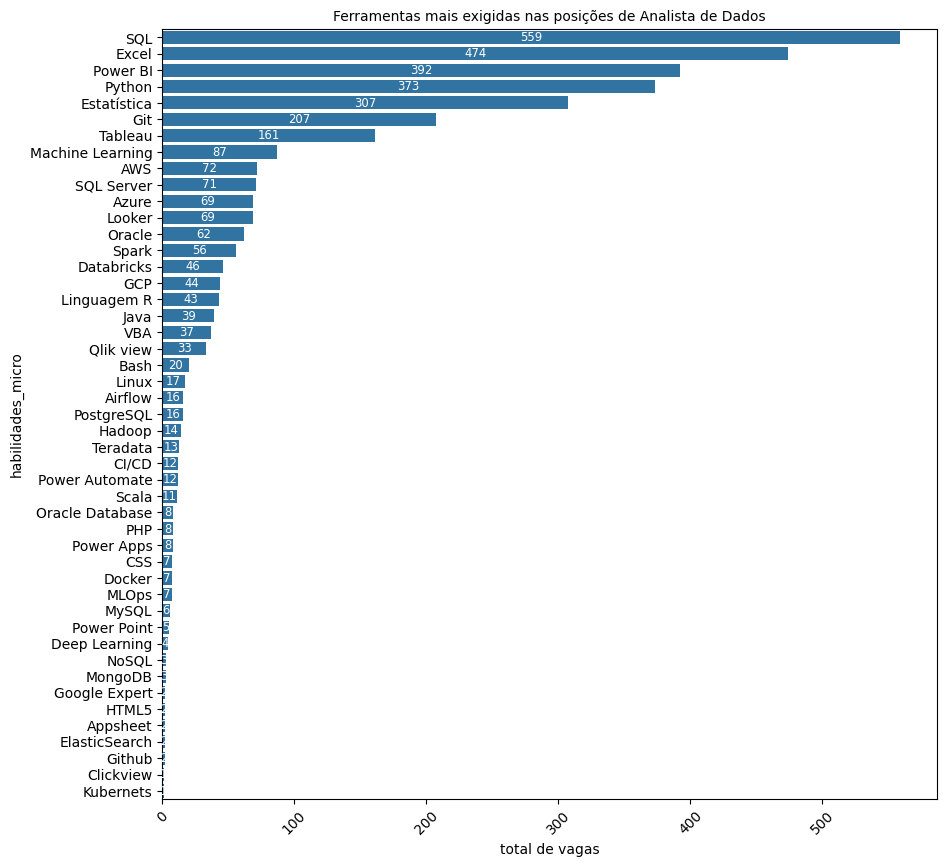

In [113]:
df_analista_aux = df_analista.explode('habilidades_micro')

barplot(
    title = 'Ferramentas mais exigidas nas posições de Analista de Dados',
    group = 'habilidades_micro',
    agg='link_site',
    agg_name='total de vagas',
    agg_func = 'count',
    data = df_analista_aux,
    orient='v',
    figsize=(10,10)
)

### Cientista de Dados

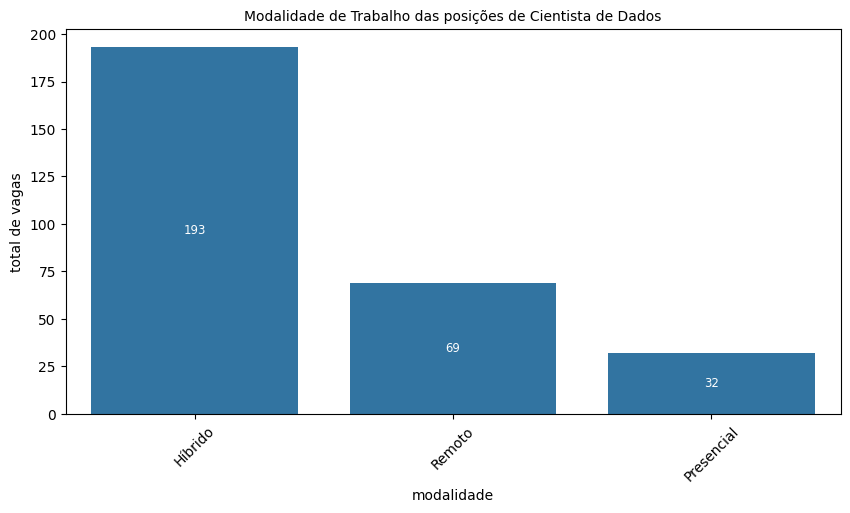

In [114]:
barplot(
    title = 'Modalidade de Trabalho das posições de Cientista de Dados',
    group = 'modalidade',
    agg='link_site',
    agg_name='total de vagas',
    agg_func = 'count',
    data = df_cientista
)

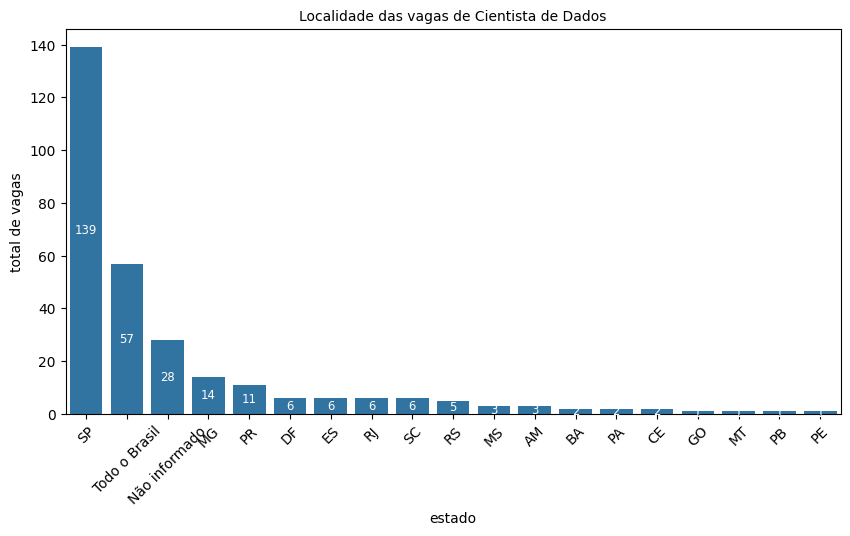

In [115]:
barplot(
    title = 'Localidade das vagas de Cientista de Dados',
    group = 'estado',
    agg='link_site',
    agg_name='total de vagas',
    agg_func = 'count',
    data = df_cientista
)

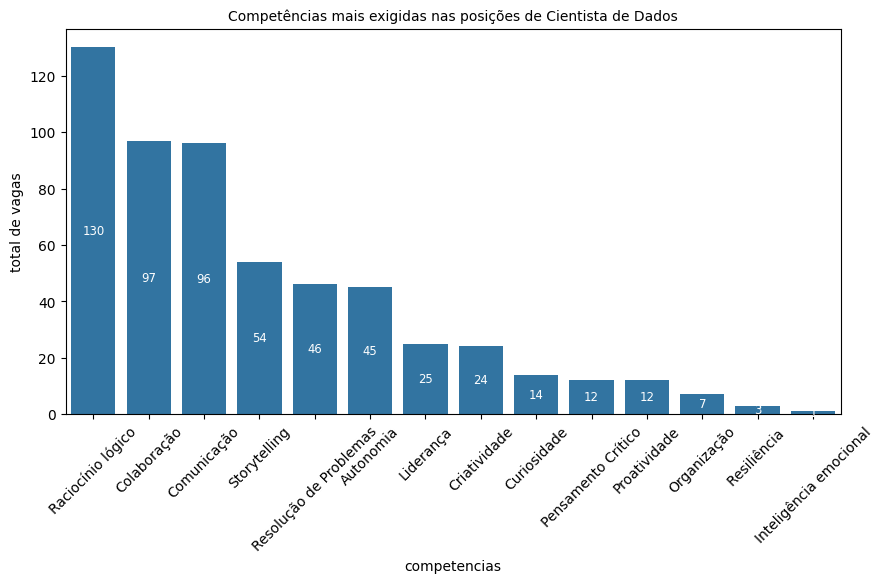

In [116]:
df_aux = df_cientista.explode('competencias')

barplot(
    title = 'Competências mais exigidas nas posições de Cientista de Dados',
    group = 'competencias',
    agg='link_site',
    agg_name='total de vagas',
    agg_func = 'count',
    data = df_aux
)

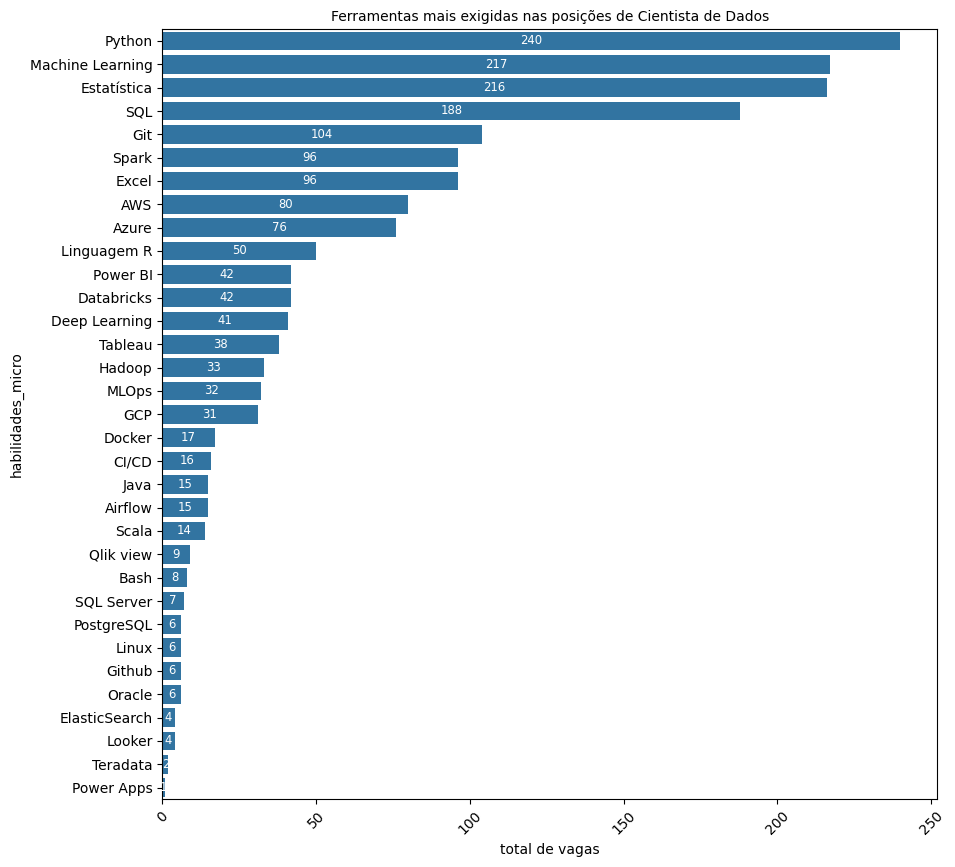

In [117]:
df_aux = df_cientista.explode('habilidades_micro')

barplot(
    title = 'Ferramentas mais exigidas nas posições de Cientista de Dados',
    group = 'habilidades_micro',
    agg='link_site',
    agg_name='total de vagas',
    agg_func = 'count',
    data = df_aux,
    orient='v',
    figsize=(10,10)
)

### Engenheiro de Dados

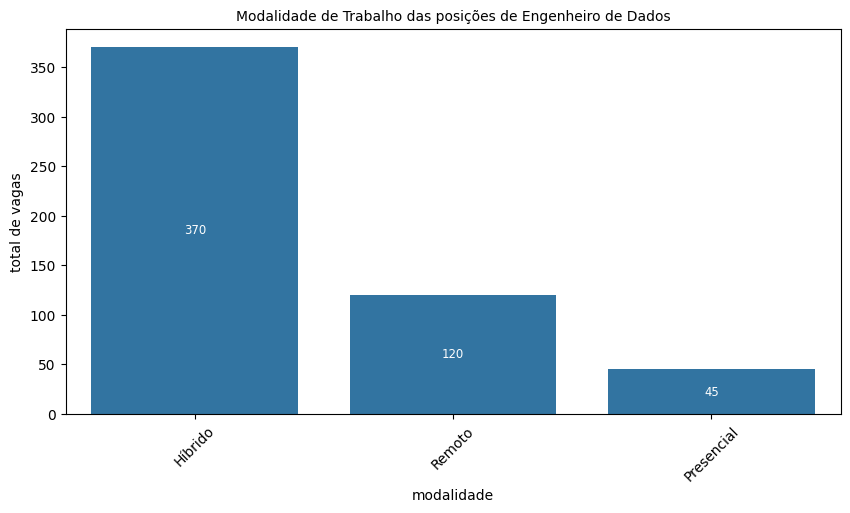

In [118]:
barplot(
    title = 'Modalidade de Trabalho das posições de Engenheiro de Dados',
    group = 'modalidade',
    agg='link_site',
    agg_name='total de vagas',
    agg_func = 'count',
    data = df_engenheiro
)

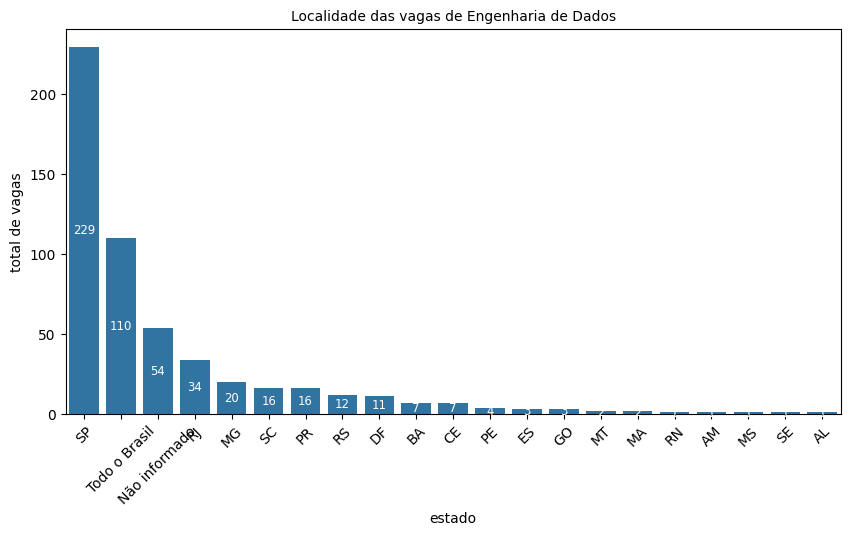

In [119]:
barplot(
    title = 'Localidade das vagas de Engenharia de Dados',
    group = 'estado',
    agg='link_site',
    agg_name='total de vagas',
    agg_func = 'count',
    data = df_engenheiro
)

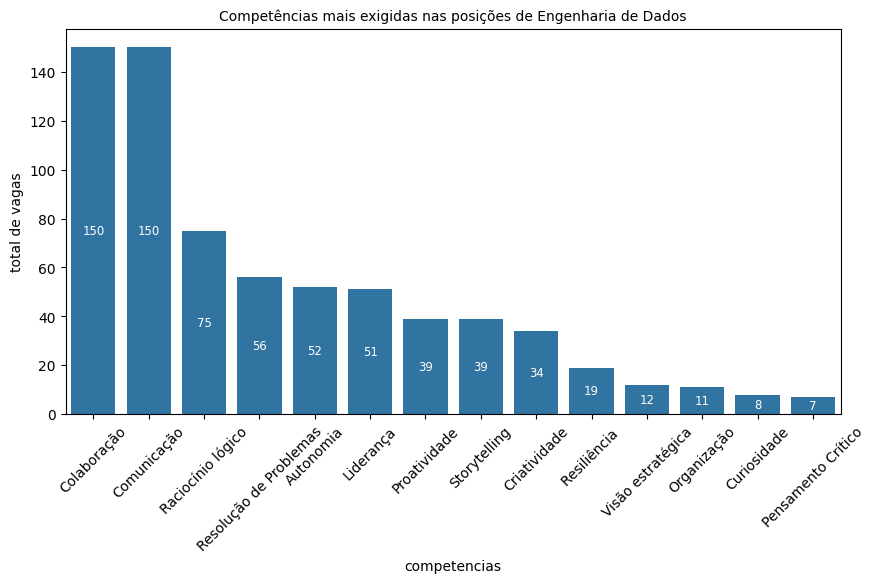

In [120]:
df_aux = df_engenheiro.explode('competencias')

barplot(
    title = 'Competências mais exigidas nas posições de Engenharia de Dados',
    group = 'competencias',
    agg='link_site',
    agg_name='total de vagas',
    agg_func = 'count',
    data = df_aux
)

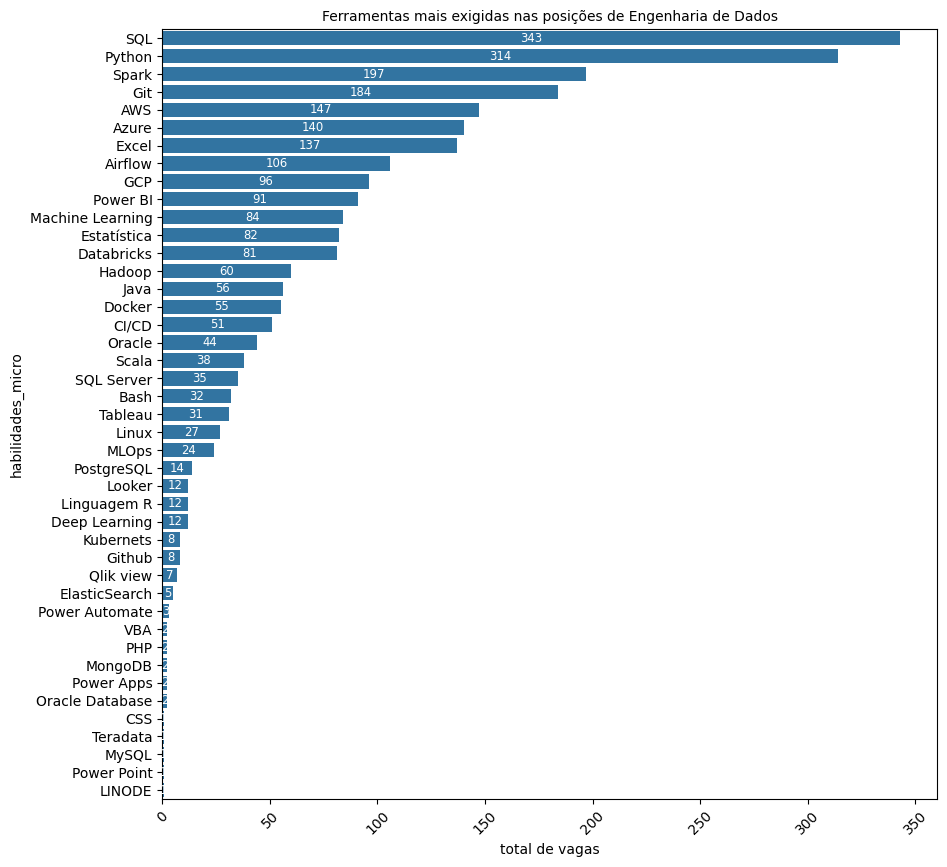

In [121]:
df_aux = df_engenheiro.explode('habilidades_micro')

barplot(
    title = 'Ferramentas mais exigidas nas posições de Engenharia de Dados',
    group = 'habilidades_micro',
    agg='link_site',
    agg_name='total de vagas',
    agg_func = 'count',
    data = df_aux,
    orient='v',
    figsize=(10,10)
)